In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dati_covid=pd.read_csv("owid-covid-data.csv")
dati_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [3]:
dimensioni_dataset= dati_covid.shape
print("Le dimensione del dataset sono:", dimensioni_dataset)

Le dimensione del dataset sono: (429435, 67)


In [36]:
dati_covid.info()
print("Colonne del dataset:", dati_covid.columns)
print("Tipi di dati delle colonne:", dati_covid.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

2. Si chiede di trovare, per ogni continente: 
a. il numero di casi fin dall'inizio della pandemia 
b. la percentuale rispetto al totale mondiale del numero di casi

In [5]:
casi_inizio = dati_covid.groupby("continent")["total_cases"].sum()
casi_totali_mondo = dati_covid["total_cases"].sum()
percentuale = (casi_inizio / casi_totali_mondo) * 100

print("Numero di casi per continente:", casi_inizio)
print("Percentuale per continente:", percentuale)

Numero di casi per continente: continent
Africa           1.461689e+10
Asia             2.521673e+11
Europe           2.367567e+11
North America    1.270737e+11
Oceania          1.159805e+10
South America    7.348457e+10
Name: total_cases, dtype: float64
Percentuale per continente: continent
Africa           0.481919
Asia             8.313966
Europe           7.805877
North America    4.189624
Oceania          0.382388
South America    2.422789
Name: total_cases, dtype: float64


3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
a. l'evoluzione del casi totali dall'inizio alla fine dell'anno 
b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [73]:
dati_covid["date"] = pd.to_datetime(dati_covid["date"])
italia_2022 = dati_covid.loc[(dati_covid["location"] == "Italy") & (dati_covid["date"].dt.year == 2022)]
italia_2022

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


<Axes: xlabel='date', ylabel='total_cases'>

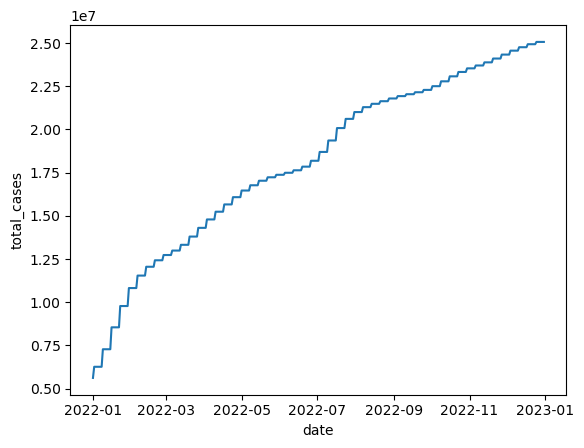

In [7]:
sns.lineplot(x="date", y="total_cases", data=italia_2022)

In [35]:
dati_italia = italia_2022.dropna(subset=["new_cases"])
dati_italia.loc[:,"new_cases"].value_counts(dropna=False)

new_cases
0.0          313
511037.0       1
718925.0       1
531327.0       1
394583.0       1
283998.0       1
193305.0       1
150922.0       1
157864.0       1
136211.0       1
110644.0       1
113218.0       1
135877.0       1
215534.0       1
280947.0       1
288452.0       1
252777.0       1
208501.0       1
165989.0       1
181181.0       1
221013.0       1
228458.0       1
227792.0       1
198433.0       1
174187.0       1
661984.0       1
340012.0       1
644604.0       1
210840.0       1
1014262.0      1
1268153.0      1
1231741.0      1
1040184.0      1
721418.0       1
510537.0       1
374443.0       1
304907.0       1
257543.0       1
332905.0       1
477051.0       1
503932.0       1
486695.0       1
447322.0       1
421707.0       1
419374.0       1
383991.0       1
304573.0       1
262374.0       1
199116.0       1
144478.0       1
116710.0       1
143614.0       1
132427.0       1
Name: count, dtype: int64

In [33]:
dati_italia = italia_2022.loc[italia_2022["new_cases"] != 0]
dati_italia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.30,12.99,8.06,2849.4834
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168831.80,12.89,3.94,2859.7395
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,181164.714,140856.0,1975.0,282.143,...,27.8,NaN,3.18,83.51,0.892,59037472,170089.10,12.83,8.03,2881.0361
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,175963.000,143296.0,2440.0,348.571,...,27.8,NaN,3.18,83.51,0.892,59037472,171694.19,12.80,10.40,2908.2239
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,148597.714,145914.0,2618.0,374.000,...,27.8,NaN,3.18,83.51,0.892,59037472,174151.69,12.84,16.50,2949.8500
186038,ITA,Europe,Italy,2022-02-06,11542793.0,721418.0,103059.714,148542.0,2628.0,375.429,...,27.8,NaN,3.18,83.51,0.892,59037472,176219.19,12.85,13.98,2984.8700
186045,ITA,Europe,Italy,2022-02-13,12053330.0,510537.0,72933.857,150824.0,2282.0,326.000,...,27.8,NaN,3.18,83.51,0.892,59037472,177489.48,12.81,8.88,3006.3870
186052,ITA,Europe,Italy,2022-02-20,12427773.0,374443.0,53491.857,152848.0,2024.0,289.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178007.39,12.72,3.66,3015.1594
186059,ITA,Europe,Italy,2022-02-27,12732680.0,304907.0,43558.143,154416.0,1568.0,224.000,...,27.8,NaN,3.18,83.51,0.892,59037472,178015.30,12.60,0.06,3015.2935
186066,ITA,Europe,Italy,2022-03-06,12990223.0,257543.0,36791.857,155782.0,1366.0,195.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178133.80,12.48,0.86,3017.3005


<Axes: xlabel='date', ylabel='new_cases'>

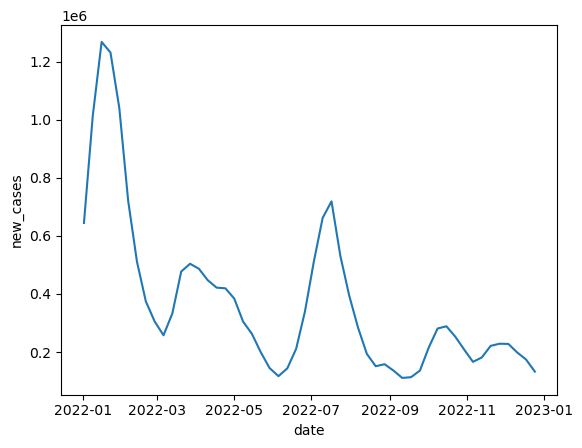

In [34]:
sns.lineplot(x="date", y="new_cases", data=dati_italia)

4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) 
a. scrivere un breve commento a riguardo

In [95]:
icu_data = dati_covid[(dati_covid["location"].isin(["Italy", "Germany", "France"])) &
              (dati_covid["date"] >= "2022-05-01") & 
              (dati_covid["date"] <= "2023-04-30")]
icu_filtro = icu_data.groupby("location")["icu_patients"].sum()
icu_filtro

location
France     334457.0
Germany    373171.0
Italy       84408.0
Name: icu_patients, dtype: float64

<Axes: xlabel='location', ylabel='icu_patients'>

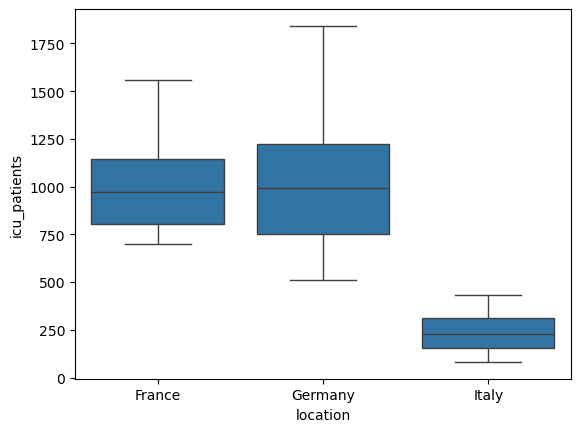

In [97]:
sns.boxplot(data=icu_data, x="location", y="icu_patients")
#il numero di pazienti in Italia in Terapia Intensiva sembra stranamente basso, forse non sono stati inviati tutti i dati?

5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
a.mostrare la somma dei pazienti ospitalizzati per ognuna
b.se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno. 

In [74]:
filtro_europe = dati_covid[(dati_covid["location"].isin(["Italy", "Germany", "France", "Spain"])) & (dati_covid["date"].dt.year ==2023)]
filtro_europe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131459,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,122241.83,6.64,25.91,1887.7128
131460,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131461,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131462,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131463,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364038,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364039,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364040,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364041,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN


In [75]:
somma_ospedalizzati = filtro_europe.groupby("location")["hosp_patients"].sum()
print("Somma dei pazienti ospedalizzati nel 2023 per ciascuna nazione:")
print(somma_ospedalizzati)

Somma dei pazienti ospedalizzati nel 2023 per ciascuna nazione:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [76]:
conteggio_valori = filtro_europe.groupby("location")["hosp_patients"].count()
conteggio_valori

location
France      90
Germany      0
Italy      365
Spain      162
Name: hosp_patients, dtype: int64

In [65]:
gruppo_nazioni = filtro_europe.groupby("location")
germania = gruppo_nazioni.get_group("Germany")
germania["hosp_patients"].value_counts(dropna=False)

hosp_patients
NaN    365
Name: count, dtype: int64

In [66]:
gruppo_nazioniF = filtro_europe.groupby("location")
Francia = gruppo_nazioniF.get_group("France")
Francia["hosp_patients"].value_counts(dropna=False)

hosp_patients
NaN        275
12940.0      2
12958.0      2
13863.0      2
12767.0      1
          ... 
15649.0      1
15986.0      1
16479.0      1
16917.0      1
13078.0      1
Name: count, Length: 88, dtype: int64

In [78]:
gruppo_nazioniS = filtro_europe.groupby("location")
Spagna = gruppo_nazioniS.get_group("Spain")
Spagna["hosp_patients"].value_counts(dropna=False)

hosp_patients
NaN       203
1798.0      3
1791.0      2
2596.0      2
1973.0      2
         ... 
1679.0      1
1686.0      1
1706.0      1
1759.0      1
1857.0      1
Name: count, Length: 146, dtype: int64

i dati delle ospedalizzazioni sono stati presi giornalmente quindi i dati di Francia e Spagna non possono essere  sostituiti o gestiti perchè coerenti con le date dell'ultimo aggiornamento del report. La Germania a quanto pare dal nostro csv non ha mai inviato nessun dato, anche se la data di aggiornamento ultima risulta essere giugno 2023. I dati nulli devono comunque rimanere tali, perchè coerenti con ciò che è stato raccolto.